In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
from PIL import Image,ImageOps
%matplotlib inline
print(os.getcwd())
os.chdir("/home/dhcoe/projects/birds/input")

/tmp/25057384-a5cc-4f9c-ba04-3ae716ac028a


In [10]:
imgpaths=pd.read_csv("./CUB_200_2011/images.txt",header=None,sep=" ",names=["id","path"])
imgpaths.head()

,id,path
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...


(347, 500, 3)


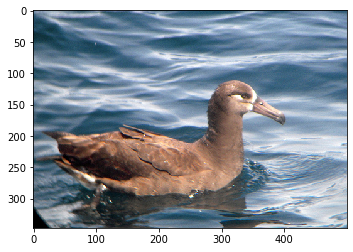

In [18]:
sample=plt.imread( os.path.join("./CUB_200_2011/images",imgpaths.loc[2]["path"]))
print(sample.shape)
plt.imshow(sample)

(336, 500, 3)


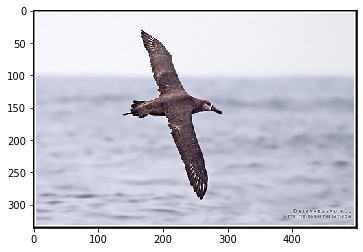

In [19]:
sample=plt.imread( os.path.join("./CUB_200_2011/images",imgpaths.loc[1]["path"]))
print(sample.shape)
plt.imshow(sample)

In [25]:
bbox=pd.read_csv( os.path.join("./CUB_200_2011","bounding_boxes.txt"),names=["id","x","y","w","h"],sep=" ")
bbox.head(3)

,id,x,y,w,h
0,1,60.0,27.0,325.0,304.0
1,2,139.0,30.0,153.0,264.0
2,3,14.0,112.0,388.0,186.0


(347, 500, 3)


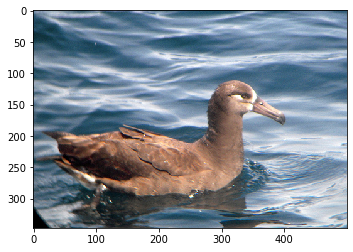

In [26]:
idx=2
sample=plt.imread( os.path.join("./CUB_200_2011/images",imgpaths.loc[idx]["path"]))
print(sample.shape)
plt.imshow(sample)

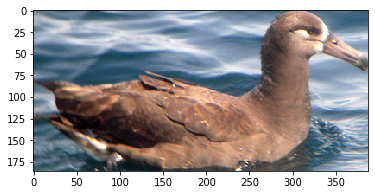

In [42]:
row=bbox.loc[idx]
row=row.astype(int)
# 
plt.imshow(sample[row["y"]:row["y"]+row["h"],row["x"]:row["x"]+row["w"],:])

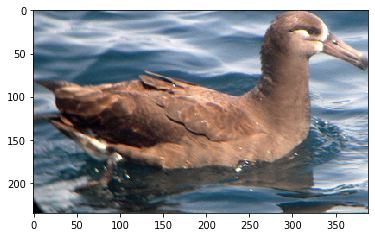

In [44]:
row=bbox.loc[idx]
row=row.astype(int)
edge=max(row["h"],row["w"])
# 
plt.imshow(sample[row["y"]:row["y"]+edge,row["x"]:row["x"]+edge,:])

(347, 500)


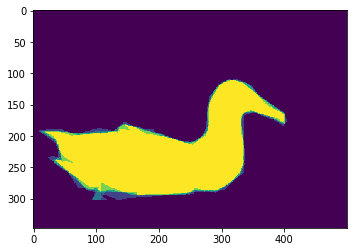

In [68]:

# idx=2
mask=plt.imread( os.path.join("./segmentations",imgpaths.loc[idx]["path"][:-3]+"png"))
print(mask.shape)
plt.imshow(mask)

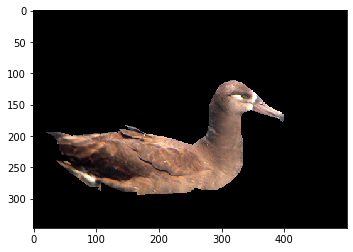

In [73]:

maskedIm=np.array(Image.fromarray(mask).convert('RGB'))*sample
plt.imshow(maskedIm)

(347, 500, 3)
112 298 14 402
(186, 388, 3)
388


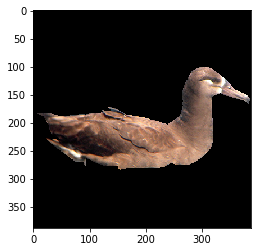

In [117]:
print(maskedIm.shape)
x,y,w,h=row["x"],row["y"],row["w"],row["h"]
print(y,y+h,x,x+w)
cropped=maskedIm[y:y+h,x:x+w,:]
print(cropped.shape)
edge=max(cropped.shape[0],cropped.shape[1])
print(edge)
padtopbot=(edge-cropped.shape[0])//2
padlr=(edge-cropped.shape[1])//2
padding=(padlr,padtopbot,padlr,padtopbot)
# left,top,right,bottom

new_im = ImageOps.expand(Image.fromarray(cropped), padding)


plt.imshow(np.array(new_im))


251


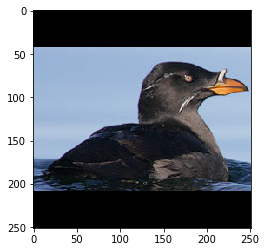

In [152]:
idx=400
imgpaths=pd.read_csv("./CUB_200_2011/images.txt",header=None,sep=" ",names=["id","path"]).set_index("id")

bbox=pd.read_csv( os.path.join("./CUB_200_2011","bounding_boxes.txt"),names=["id","x","y","w","h"],sep=" ").set_index("id")

rawimage=plt.imread( os.path.join("./CUB_200_2011/images",imgpaths.loc[idx]["path"]))
# plt.imshow(rawimage)

bbox.head(3)

mask=plt.imread( os.path.join("./segmentations",imgpaths.loc[idx]["path"][:-3]+"png"))
# plt.imshow(mask)
# maskedIm=np.array(Image.fromarray(mask).convert('RGB'))*rawimage
maskedIm=rawimage
# plt.imshow(maskedIm)
row=bbox.loc[idx]
row=row.astype(int)
x,y,w,h=row["x"],row["y"],row["w"],row["h"]
cropped=maskedIm[y:y+h,x:x+w,:]
edge=max(cropped.shape[0],cropped.shape[1])
print(edge)
padtopbot=(edge-cropped.shape[0])//2
padlr=(edge-cropped.shape[1])//2
padding=(padlr,padtopbot,padlr,padtopbot)
# left,top,right,bottom

new_im = ImageOps.expand(Image.fromarray(cropped), padding)#.resize((200,200))


plt.imshow(np.array(new_im))

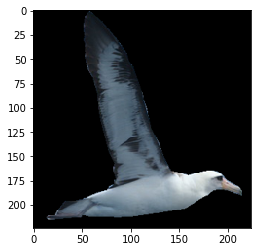

In [181]:
import joblib
n=joblib.load("./pickles/p1_82.pkl")
plt.imshow(n)

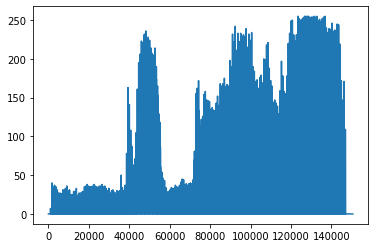

In [173]:
pd.Series(np.array(n).flatten()).plot()

In [207]:
len(glob("./pickles/*"))

11019

In [188]:
doods=np.load("doodles/bird.npy")
doods.shape

(133572, 784)

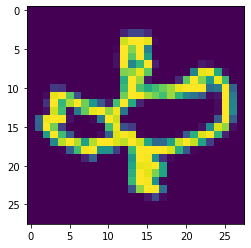

In [206]:
plt.imshow(doods[12].reshape(28,28))

In [208]:
pd.Series(doods[12]).describe()

count    784.000000
mean      45.211735
std       86.138064
min        0.000000
25%        0.000000
50%        0.000000
75%       18.250000
max      255.000000
dtype: float64

In [209]:
pd.Series(np.array(n).flatten()).describe()

count    150528.000000
mean         26.950926
std          53.040507
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max         255.000000
dtype: float64